In [1]:
import pandas as pd
import numpy as np

In [54]:
columns=['user_id','item_id','Rating','time']
df=pd.read_csv('u.data',sep='\t',names=columns)

In [55]:
df.head()

,user_id,item_id,Rating,time
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [56]:
movies=pd.read_csv('Movie_Id_Titles')

In [57]:
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [58]:
df=pd.merge(df,movies,on='item_id')

In [59]:
df.head()

,user_id,item_id,Rating,time,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [60]:
df.groupby('title')['Rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Rating, dtype: float64

In [61]:
df.groupby('title')['Rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Rating, dtype: int64

In [62]:
movies_rating=pd.DataFrame(df.groupby('title')['Rating'].mean())

In [63]:
movies_rating.head()

,Rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [64]:
movies_watched=pd.DataFrame(df.groupby('title')['Rating'].count())

In [65]:
movies_watched.head()

,Rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


In [66]:
movies_rating['watched']=pd.DataFrame(df.groupby('title')['Rating'].count())

In [67]:
movies_rating.head()

,Rating,watched
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


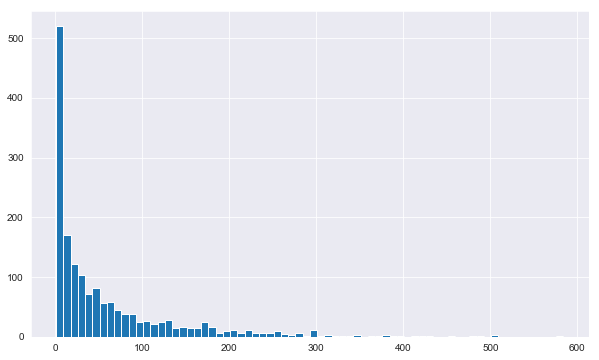

In [69]:
plt.figure(figsize=(10,6))
movies_rating['watched'].hist(bins=70)

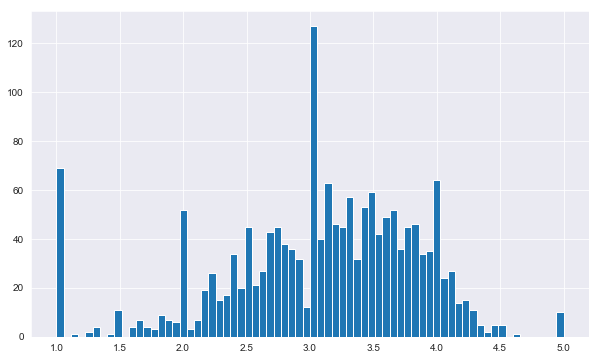

In [70]:
plt.figure(figsize=(10,6))
movies_rating['Rating'].hist(bins=70)

F:\ancnda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


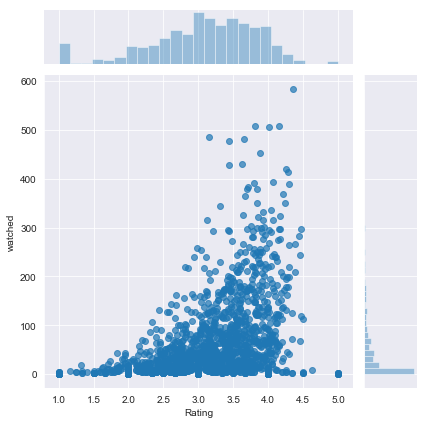

In [71]:
sns.jointplot(x='Rating',y='watched',data=movies_rating,kind='scatter',alpha=0.7)

In [74]:
moviemat=df.pivot_table(columns='title',values='Rating',index='user_id')

In [75]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
movies_rating.sort_values('Rating',ascending=False).head(10)

,Rating,watched
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
"Great Day in Harlem, A (1994)",5.0,1
Aiqing wansui (1994),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


In [78]:
movies_rating.sort_values('watched',ascending=False).head(10)

,Rating,watched
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [79]:
star_war=moviemat['Star Wars (1977)']

In [80]:
star_war.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [81]:
starwar=moviemat.corrwith(star_war)

F:\ancnda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
F:\ancnda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [82]:
starwar.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [85]:
corrstars=pd.DataFrame(starwar,columns=['Corelation'])
corrstars.dropna(inplace=True)

In [86]:
corrstars.head()

,Corelation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [87]:
corrstars['Corelation'].sort_values(ascending=False).head()

title
No Escape (1994)          1.0
Man of the Year (1995)    1.0
Hollow Reed (1996)        1.0
Commandments (1997)       1.0
Cosi (1996)               1.0
Name: Corelation, dtype: float64

In [90]:
corrstar=corrstars.join(movies_rating['watched'])
corrstar.head()

,Corelation,watched
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [91]:
corrstar[corrstar['watched']>100].sort_values('Corelation',ascending=False).head()

,Corelation,watched
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [92]:
contact=moviemat['Contact (1997)']

In [94]:
contact.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [108]:
cntact=moviemat.corrwith(contact)
cntact

F:\ancnda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
F:\ancnda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.904534
1-900 (1994)                                  NaN
101 Dalmatians (1996)                   -0.108441
12 Angry Men (1957)                      0.022265
187 (1997)                               0.135512
                                           ...   
Young Guns II (1990)                     0.326304
Young Poisoner's Handbook, The (1995)   -0.006864
Zeus and Roxanne (1997)                 -0.866025
unknown                                  0.243975
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [109]:
cntact=pd.DataFrame(cntact,columns=['Coorelation'])
cntact.dropna(inplace=True)
cntact

,Coorelation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031
...,...
Young Guns (1988),0.388839
Young Guns II (1990),0.326304
"Young Poisoner's Handbook, The (1995)",-0.006864


In [110]:
cntact=cntact.join(movies_rating['watched'])
cntact.head()

,Coorelation,watched
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [112]:
cntact[cntact['watched']>100].sort_values('Coorelation',ascending=False).head()

,Coorelation,watched
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
